In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = r"C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Assignment-6\Hand Writing\\"
Label = {
    "ai" : 0,
    "bA" : 1,
    "chA" : 2,
    "dA" : 3,
    "lA" : 4
}

def normalize_list(numbers):
    min_val = min(numbers)
    max_val = max(numbers)
    normalized = [(x - min_val) / (max_val - min_val) for x in numbers]
    return normalized

Train = []
Train_Label = []
Test = []
Test_Label = []

for i in os.listdir(path):
    for j in os.listdir(path+i):
        for k in os.listdir(path+i+'\\'+j):
            data = np.loadtxt(path+i+'\\'+j+'\\'+k, dtype=np.float64)
            data = data[1:] #Excluding the No of sequences
            data = data.reshape((-1,2))
            data[:,0] = normalize_list(data[:,0])
            data[:,1] = normalize_list(data[:,1])
            if j == 'dev':
                Test.append(data.reshape((-1,2)))
                Test_Label.append(Label[str(i)])
            else :
                Train.append(data.reshape((-1,2)))
                Train_Label.append(Label[str(i)])

In [3]:
Train_Label.index(0)

0

In [4]:
# Train_Normalized = np.array(Train_Normalized)
# Train_Normalized = Train_Normalized.reshape(-1,2)
# Train_Normalized[0]
len(Train)
Unique_Alphabets = []
Unique_Alphabets.append(Train_Label.index(0))
Unique_Alphabets.append(Train_Label.index(1))
Unique_Alphabets.append(Train_Label.index(2))
Unique_Alphabets.append(Train_Label.index(3))
Unique_Alphabets.append(Train_Label.index(4))
Unique_Alphabets

[0, 70, 137, 207, 276]

In [5]:
Train_Padded = tf.keras.utils.pad_sequences(Train, dtype=np.float64, padding="post", value=2, maxlen=200)
Test_Padded = tf.keras.utils.pad_sequences(Test, dtype=np.float64, padding="post", value=2, maxlen=200)

Train_Label = tf.constant(Train_Label)
Test_Label = tf.constant(Test_Label)

In [6]:
%store Train_Padded
%store Test_Padded
%store Train_Label
%store Test_Label

Stored 'Train_Padded' (ndarray)
Stored 'Test_Padded' (ndarray)
Stored 'Train_Label' (EagerTensor)
Stored 'Test_Label' (EagerTensor)


# RNN

# Architecture 1

In [7]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((200,2)),
#     tf.keras.layers.Masking(mask_value=2),
#     tf.keras.layers.SimpleRNN(5),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])
# model.summary()

# Architecture 2

In [8]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((200,2)),
#     tf.keras.layers.Masking(mask_value=2),
#     tf.keras.layers.SimpleRNN(5,return_sequences=True),
#     tf.keras.layers.SimpleRNN(5),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])

# model.summary()

# Architecture 3

In [9]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((200,2)),
#     tf.keras.layers.Masking(mask_value=2),
#     tf.keras.layers.SimpleRNN(32,return_sequences=True),
#     tf.keras.layers.SimpleRNN(16),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])

# model.summary()

# Architecture 4

In [10]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((200,2)),
#     tf.keras.layers.Masking(mask_value=2),
#     tf.keras.layers.SimpleRNN(32,return_sequences=True),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.SimpleRNN(16),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])

# model.summary()

In [11]:
# tf.random.set_seed(68)

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
# Trained_Model = model.fit(Train_Padded,Train_Label,verbose=0,callbacks=Callback,epochs=1000)

# plt.plot(Trained_Model.history["loss"])

# print(model.evaluate(Train_Padded,Train_Label))
# print(model.evaluate(Test_Padded,Test_Label))

In [21]:
Unique_Alphabets=[0,1,2,3,4,70,71,72,73,74,137,138,139,140,141,207,208,209,210,211,276,277,278,279,280]

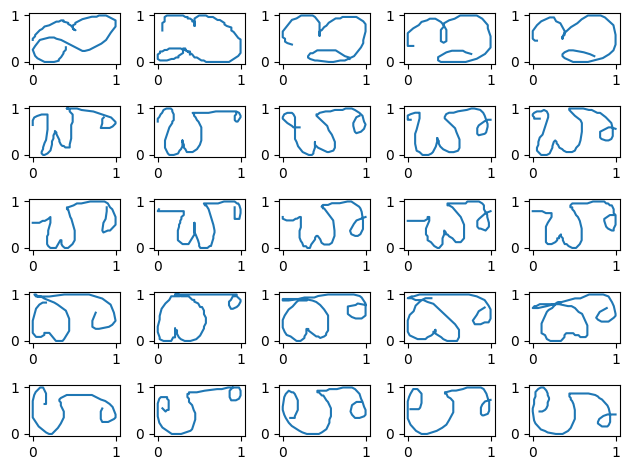

In [24]:
row=0

for i,j in enumerate(Unique_Alphabets):
    plt.subplot(5,5,i+1)
    plt.plot(Train[j][:,0],Train[j][:,1])
    plt.tight_layout()


# LSTM

Architecture -1

In [13]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((200,2)),
#     tf.keras.layers.Masking(mask_value=2),
#     tf.keras.layers.LSTM(5),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])
# model.summary()

Architecture 2

In [14]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((200,2)),
#     tf.keras.layers.Masking(mask_value=2),
#     tf.keras.layers.LSTM(5,return_sequences=True),
#     tf.keras.layers.LSTM(5),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])
# model.summary()

Architecture 3

In [15]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((200,2)),
#     tf.keras.layers.Masking(mask_value=2),
#     tf.keras.layers.LSTM(8,return_sequences=True),
#     tf.keras.layers.LSTM(16),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(100),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])

# model.summary()

Architecture 4

In [16]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((200,2)),
#     tf.keras.layers.Masking(mask_value=2),
#     tf.keras.layers.LSTM(32,return_sequences=True),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(16),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])

# model.summary()

In [17]:
# tf.random.set_seed(68)

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
# Trained_Model = model.fit(Train_Padded,Train_Label,verbose=0,callbacks=Callback,epochs=1000)

# plt.plot(Trained_Model.history["loss"])

# print(model.evaluate(Train_Padded,Train_Label))
# print(model.evaluate(Test_Padded,Test_Label))